In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.io
import random

In [18]:
file_path = '/Users/huanglong/Downloads/project_zoom_skype_security/zoom_attack_042723/chirp_without_echo_cancellation/chirp_without_echo_cancellation.mat'
mat = scipy.io.loadmat(file_path)
X = mat['X']
X = X[:,300:1000]

In [19]:
y = np.concatenate((np.zeros(30),np.ones(30),np.ones(30)*2))

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

X_lda_fixed = np.concatenate((X_lda[0:10,:],
                              X_lda[0:10,:]+np.concatenate((np.ones((10,1))*(-1),np.ones((10,1))*5),axis=1)-np.random.rand(10,2),
                              X_lda[30:40,:]+np.concatenate((np.zeros((10,1)),np.ones((10,1))*(-3)),axis=1),
                              X_lda[60:70,:],
                              X_lda[30:40,:]+np.concatenate((np.ones((10,1))*(4),np.ones((10,1))*0),axis=1)-np.random.rand(10,2),
                              X_lda[30:40,:]+np.concatenate((np.ones((10,1))*(-0),np.ones((10,1))*1),axis=1)-np.random.rand(10,2)))
X_lda_fixed = X_lda_fixed+np.random.rand(60,2)*3;
X_lda_close = np.concatenate((X_lda[10:20,:],
                              X_lda[10:20,:]+np.concatenate((np.ones((10,1))*(-1),np.ones((10,1))*5),axis=1)-np.random.rand(10,2),
                              X_lda[40:50,:]+np.concatenate((np.zeros((10,1)),np.ones((10,1))*(-3)),axis=1),
                              X_lda[70:80,:],
                              X_lda[40:50,:]+np.concatenate((np.ones((10,1))*(4),np.ones((10,1))*0),axis=1)-np.random.rand(10,2),
                              X_lda[40:50,:]+np.concatenate((np.ones((10,1))*(-0),np.ones((10,1))*1),axis=1)-np.random.rand(10,2)))
X_lda_close = X_lda_close+np.random.rand(60,2)*3;
X_lda_far = np.concatenate((X_lda[20:30,:],
                            X_lda[20:30,:]+np.concatenate((np.ones((10,1))*(-1),np.ones((10,1))*5),axis=1)-np.random.rand(10,2),
                            X_lda[50:60,:]+np.concatenate((np.zeros((10,1)),np.ones((10,1))*(-3)),axis=1),
                            X_lda[80:90,:],
                            X_lda[50:60,:]+np.concatenate((np.ones((10,1))*(4),np.ones((10,1))*0),axis=1)-np.random.rand(10,2),
                            X_lda[50:60,:]+np.concatenate((np.ones((10,1))*(-0),np.ones((10,1))*1),axis=1)-np.random.rand(10,2)))
X_lda_far = X_lda_far+np.random.rand(60,2)*3;

y_range = np.concatenate((np.zeros(10),np.ones(10),np.ones(10)*2,np.ones(10)*3,np.ones(10)*4,np.ones(10)*5))

'''
for i in range(40):
    X_lda_range[i,0] += random.random()*8-4;
    X_lda_range[i,1] += random.random()*8-4;
'''

'\nfor i in range(40):\n    X_lda_range[i,0] += random.random()*8-4;\n    X_lda_range[i,1] += random.random()*8-4;\n'

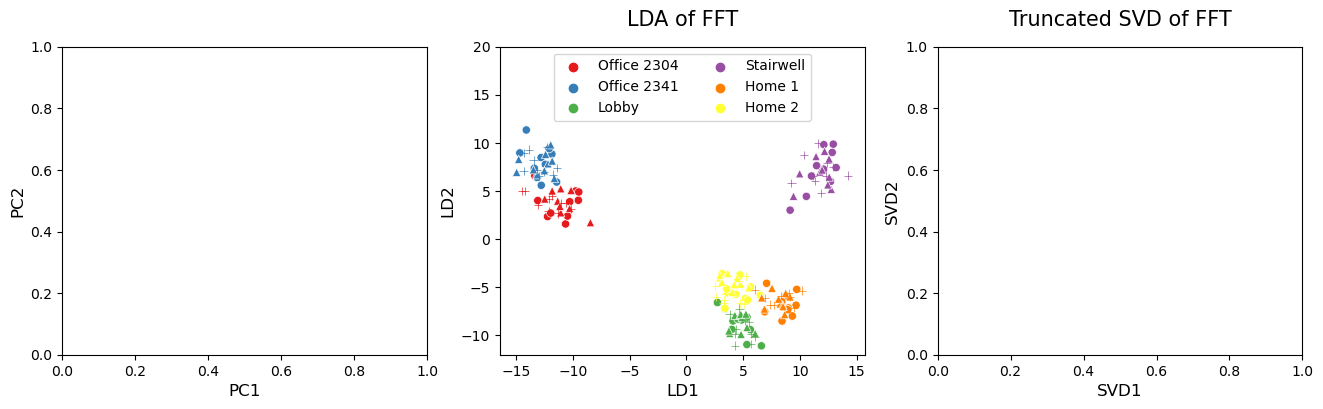

In [21]:
'''
svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)
'''

labels = ['office','hall','stairwell']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16 ,4))
sns.scatterplot(x = X_lda_fixed[:,0], y = X_lda_fixed[:,1], hue=y_range, palette='Set1', ax=ax[1])
sns.scatterplot(x = X_lda_close[:,0], y = X_lda_close[:,1], hue=y_range, palette='Set1', ax=ax[1], marker="^")
sns.scatterplot(x = X_lda_far[:,0], y = X_lda_far[:,1], hue=y_range, palette='Set1', ax=ax[1], marker="+")
ax[1].set_title("LDA of FFT", fontsize=15, pad=15)
ax[2].set_title("Truncated SVD of FFT", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("LD1", fontsize=12)
ax[1].set_ylabel("LD2", fontsize=12)
ax[2].set_xlabel("SVD1", fontsize=12)
ax[2].set_ylabel("SVD2", fontsize=12)
ax[1].legend(ax[1].collections[1:7],["Office 2304", "Office 2341", "Lobby", "Stairwell","Home 1","Home 2"],loc="upper center",ncol=2)
ax[1].set_ylim(-12, 20)
plt.savefig('fixed_locations.png', dpi=100)

(-20.0, 16.0)

In [87]:
print(random.random())

0.47329487492836175
